In [41]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import os

## scans per center per month

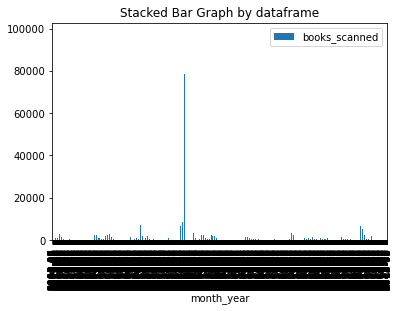

In [14]:
scans_per_month = pd.read_csv("https://raw.githubusercontent.com/ers6/ia_scanning_labor_data/main/csv_files/scans_per_center_per_month.csv")[['name', 'month_year', 'books_scanned']]

scans_per_month.plot(x='month_year', y='books_scanned', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
plt.show()

In [19]:

alt.Chart(scans_per_month).mark_bar().encode(
    y='month_year',
    x='books_scanned',
    color='name'
)

alt.Chart(...)

In [24]:
scans_workers = pd.read_csv("https://raw.githubusercontent.com/ers6/ia_scanning_labor_data/main/csv_files/scans_and_workers_month_stats.csv")[['name', 'month_year', 'books_scanned', 'operator', 'pages_scanned', 'scans_to_workers', 'pages_to_workers']]

allen = scans_workers.loc[scans_workers['name']== 'Allen County Public Library Geneaology Center']

allen

,name,month_year,books_scanned,operator,pages_scanned,scans_to_workers,pages_to_workers
0,Allen County Public Library Geneaology Center,2002-01,4,3,1366.0,1.333333,455.333333
1,Allen County Public Library Geneaology Center,2008-05,78,11,37763.0,7.090909,3433.000000
2,Allen County Public Library Geneaology Center,2008-06,583,21,240186.0,27.761905,11437.428571
3,Allen County Public Library Geneaology Center,2008-07,664,22,274770.0,30.181818,12489.545455
4,Allen County Public Library Geneaology Center,2008-08,641,21,257029.0,30.523810,12239.476190
...,...,...,...,...,...,...,...
176,Allen County Public Library Geneaology Center,2023-02,447,24,168444.0,18.625000,7018.500000
177,Allen County Public Library Geneaology Center,2023-03,1269,23,253923.0,55.173913,11040.130435
178,Allen County Public Library Geneaology Center,2023-04,1178,22,165378.0,53.545455,7517.181818
179,Allen County Public Library Geneaology Center,2023-05,1406,23,149438.0,61.130435,6497.304348


In [66]:
# data is a subset of a dataframe representing a single center
def make_scatters(data, file_name):
    alt.Chart(data).mark_circle(size=60).encode(
        x='month_year',
        y='pages_to_workers',
        tooltip=['month_year', 'pages_to_workers', 'pages_scanned', 'operator']
    ).interactive().save(this_file + pages_to_workers_ratio_over_time_scatters.html')

SyntaxError: EOL while scanning string literal (2529804936.py, line 7)

In [68]:
import re


centers = scans_workers['name'].unique().tolist()

for center in centers: 
    print(center)
    this_file = re.sub(' ', "_", str(center))
    this_file = re.sub('\.', '', this_file)
    this_file = re.sub(',', '', this_file).lower()
#     print('this file', this_file)
    os.mkdir('/Users/e.schwartz/Documents/Github/ia_scanning_labor_data/center_visuals/' +this_file+'/')
    print(this_file)     
    make_scatters(scans_workers.loc[scans_workers['name']== center], '/Users/e.schwartz/Documents/Github/ia_scanning_labor_data/center_visuals/' +this_file+'/')

Allen County Public Library Geneaology Center
allen_county_public_library_geneaology_center
American Museum of Natural History
american_museum_of_natural_history
American Numismatic Society
american_numismatic_society
American Printing House for the Blind
american_printing_house_for_the_blind
Analysis and Policy Observatory (APO)
analysis_and_policy_observatory_(apo)
BYU, Hawaii
byu_hawaii
BYU, Idaho Family History Library
byu_idaho_family_history_library
BYU, Provo
byu_provo
Boston Public Library
boston_public_library
British Library
british_library
Brown University
brown_university
California Acaddemy of Sciences
california_acaddemy_of_sciences
California State Library
california_state_library
Centre for Strategic and International Studies, Jakarta
centre_for_strategic_and_international_studies_jakarta
Church History Library
church_history_library
Clatsop County Historical Society
clatsop_county_historical_society
Clemson University
clemson_university
Columbia University
columbia_uni

In [17]:
import altair as alt
from vega_datasets import data

source = data.barley()
selector = alt.selection_point(encodings=['color'])

alt.Chart(source).mark_bar().encode(
    x='variety',
    y='sum(yield)',
    color=alt.condition(selector, 'site', alt.value('lightgray'))
).add_params(selector)

alt.Chart(...)

In [22]:
scans_and_workers = pd.read_csv('/Users/e.schwartz/Documents/GitHub/ia_scanning_labor_data/csv_files/scans_and_workers_month_stats.csv')

,Unnamed: 0,name,month_year,books_scanned,operator,pages_scanned,scans_to_workers,pages_to_workers
0,0,Allen County Public Library Geneaology Center,2002-01,4,3,1366.0,1.333333,455.333333
1,1,Allen County Public Library Geneaology Center,2008-05,78,11,37763.0,7.090909,3433.000000
2,2,Allen County Public Library Geneaology Center,2008-06,583,21,240186.0,27.761905,11437.428571
3,3,Allen County Public Library Geneaology Center,2008-07,664,22,274770.0,30.181818,12489.545455
4,4,Allen County Public Library Geneaology Center,2008-08,641,21,257029.0,30.523810,12239.476190
...,...,...,...,...,...,...,...,...
4818,4818,Yiddish Book Center,2013-05,43,8,6893.0,5.375000,861.625000
4819,4819,Yiddish Book Center,2013-06,56,9,8322.0,6.222222,924.666667
4820,4820,Yiddish Book Center,2013-07,12,3,1957.0,4.000000,652.333333
4821,4821,Yiddish Book Center,2013-08,8,1,1009.0,8.000000,1009.000000


In [46]:
selector = alt.selection_point(encodings=['color'])
alt.Chart(scans_and_workers.loc[scans_and_workers['name']=='Innodata Knowledge Services, Inc.']).mark_circle().encode(
    x='month_year:N',
    y1='pages_to_workers:Q',
    y2 = 'operators:Q'
#     color = alt.condition(selector, 'name:N', alt.value('lightgray'))
).add_params(selector).interactive()

SchemaValidationError: `Encoding` has no parameter named 'y1'

Existing parameter names are:
angle         key          order     strokeDash      tooltip   xOffset   
color         latitude     radius    strokeOpacity   url       y         
description   latitude2    radius2   strokeWidth     x         y2        
detail        longitude    shape     text            x2        yError    
fill          longitude2   size      theta           xError    yError2   
fillOpacity   opacity      stroke    theta2          xError2   yOffset   
href                                                                     

See the help for `Encoding` to read the full description of these parameters

alt.Chart(...)

In [42]:
scans_and_workers.loc[scans_and_workers['name']=='UIUC']

,Unnamed: 0,name,month_year,books_scanned,operator,pages_scanned,scans_to_workers,pages_to_workers
3611,3611,UIUC,2001-12,3,1,274.0,3.000000,274.000000
3612,3612,UIUC,2007-02,42,11,14180.0,3.818182,1289.090909
3613,3613,UIUC,2007-03,322,22,90111.0,14.636364,4095.954545
3614,3614,UIUC,2007-04,284,21,93166.0,13.523810,4436.476190
3615,3615,UIUC,2007-05,352,22,106388.0,16.000000,4835.818182
...,...,...,...,...,...,...,...,...
3802,3802,UIUC,2023-02,348,18,143510.0,19.333333,7972.777778
3803,3803,UIUC,2023-03,581,23,183295.0,25.260870,7969.347826
3804,3804,UIUC,2023-04,131,20,67908.0,6.550000,3395.400000
3805,3805,UIUC,2023-05,592,22,65196.0,26.909091,2963.454545


In [43]:
selector = alt.selection_point(encodings=['color'])
alt.Chart(scans_and_workers.loc[scans_and_workers['name']=='UIUC']).mark_circle().encode(
    x='month_year:N',
    y='pages_to_workers:Q',
    color = alt.condition(selector, 'name:N', alt.value('lightgray'))
).add_params(selector).interactive()

alt.Chart(...)

In [16]:
import altair as alt
from vega_datasets import data

source = data.barley()

alt.Chart(source).mark_bar().encode(
    x='variety',
    y='sum(yield)',
    color='site'
)

alt.Chart(...)

limear regression 

plotting a line for each center 

x=time 

y= books scanned 


this is a significant difference 

trivariate regression 


1. throw out bulk uploaders partner
2. get daily scans and workers'
3. send to dust 

